# Marble Data

In this lesson you will learn about how to see if a dataset is normal distributed. We will do this by first looking at dataset that is likely normally distributed and then construct a special graph that shows how close it is to the normal distribution. Part of the goal of this lesson is for you to create a dataset and move it into Cocalc. Again the objectives here are:

* Learn how to create and import a csv file to Cocalc.
* Analyze a varaible with the Q-Q plot to determine how normal a variable is.

## UnNormal data
We will start by looking at dataset we have looked at before that is decidely not normally distributed. The ```faithful``` dataset is one that standsout from the past because it is not normally distributed.

Load the dataset with:

```
library(dplyr)
library(ggplot2)
data(faithful)
```

Then create a histogram of the ```waiting``` variable with:

```
ggplot(faithful, aes(x=waiting))+geom_histogram()
```


In [34]:
library(dplyr)
library(ggplot2)
data(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


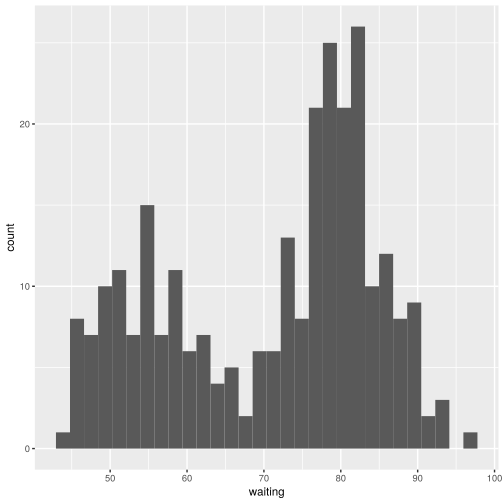

**Describe below what quality that you see in the histogram stands out as "unnormal"**

## Q-Q plot

To see if something is normal we make a calculation with the normal distribution. If a variable followed the normal distribution then we would expect the median to be the mean, for instance. Let's see if that happens by doing:

```
summary(faithful$waiting)
```

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   43.0    58.0    76.0    70.9    82.0    96.0 

In fact, they are pretty far apart. Let's look at other landmarks in the data rather than just the 50% quantile (median). First we compute lots of quantile information with:

```
quantile(faithful$waiting, c(.1,.2,.3,.4,.5,.6,.7,.8,.9))
```

10% 
 51 
 20% 
 55 
 30% 
 60 
 40% 
 71 
 50% 
 76 
 60% 
 78 
 70% 
 81 
 80% 
 83 
 90% 
 86

Now we will calculate what the numbers would be expected to be if the dataset was normal. To do this we first calculate the mean and the standard deviation. Then calculate what the same quantiles would be for a normal distribution with that mean and standard deviation.

```
m<-mean(faithful$waiting)
s<-sd(faithful$waiting)
qnorm(c(.1,.2,.3,.4,.5,.6,.7,.8,.9), mean=m, sd=s, lower.tail=TRUE)
```

**Which true quantile was closest to the one predicted by the normal distribution?**

## Q-Q plot

Rather than going through this rigmarole of calculating all these quantiles it would be better to create a plot. We could do a scatterplot where the y coordinate measured the real value and the x coordinate the expected value based on the idea that the plot was normal. This is the idea of the **Q-Q plot**.

```
ggplot(faithful, aes(sample = waiting)) + stat_qq()+stat_qq_line()
```

The line in this graph shows the trend we would hope to see if the graphs was normal. We are pretty far from that in this graph. The y-axis shows the values in the dataset. The x-axis is labeled by the z-score of the expected value. Just as a quick example, let's generate 100 random normal distributed numbers and create the Q-Q plot for them.

```
rn<-data.frame(y=rnorm(100, mean=70, sd=10))
ggplot(rn, aes(sample = y)) + stat_qq()+stat_qq_line()
```


Here you can see that the Q-Q plot is close to the line in the middle, but gets a little rougher on the ends. The ends are more subject to variation as they are determined by less data. 

## Your turn

Watch the video 

 <iframe width="560" height="315"
src="https://www.youtube.com/embed/1tN00ub572M" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

It is interesting that there is a youtube channel dedicated to watching a random process and then putting commentary over that. In Excel or google sheets record the times from the video. We want to see if they are normally distributed. There is a lot of reason to think that they are randomly distributed because there are lots of small random events that seems to determine how long it takes the marble to get down the track. The **Central Limit Theorem** states that when lots of random events are added together we should get a normal distribution.

So in the spreadsheet that you have opened scroll through the video and record the speeds from every race (there should be 23 times).  Create a table that has label at the top of a column then all the times listed below. Save or export the sheet as a comma separated values file. Then move to the file to this folder (Go to folder icon and then drag this file so that the data file lands on the file list).

Finally load your data using ```read.csv``` and do the following:

* Create a q-q plot of the marble times
* Show a 5 number summary of the marble times
* Calculate the mean and standard deviation of the marble times
* Create a q-q plot of 23 randomly normally distributed times
* Discuss if the q-q plot supports the idea that the marblelympics times are normally distributed

